# Data Inspection and Exploration

## Why Data Inspection?
Before analyzing data, we must:
1. **Understand** the structure and content
2. **Identify** data quality issues
3. **Explore** patterns and distributions
4. **Validate** assumptions about the data

## Key Inspection Categories:
1. **Structural Inspection**: Shape, size, columns, index
2. **Content Inspection**: Sample rows, unique values, counts
3. **Statistical Inspection**: Summary statistics, distributions
4. **Quality Inspection**: Missing values, duplicates, outliers
5. **Type Inspection**: Data types, memory usage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a comprehensive sample dataset with various data types and issues
np.random.seed(42)

# Generate sample data
n_rows = 1000
data = {
    'customer_id': [f'CUST{str(i).zfill(4)}' for i in range(1, n_rows + 1)],
    'age': np.random.randint(18, 70, n_rows),
    'salary': np.random.normal(50000, 15000, n_rows).round(2),
    'purchase_amount': np.random.exponential(100, n_rows).round(2),
    'city': np.random.choice(['New York', 'London', 'Tokyo', 'Paris', 'Berlin', 
                              'Sydney', 'Singapore', 'Toronto'], n_rows, p=[0.3, 0.2, 0.15, 0.1, 0.08, 0.07, 0.06, 0.04]),
    'membership_tier': np.random.choice(['Bronze', 'Silver', 'Gold', 'Platinum', None], 
                                        n_rows, p=[0.4, 0.3, 0.2, 0.05, 0.05]),
    'last_purchase_date': pd.date_range('2022-01-01', periods=n_rows, freq='D').to_list(),
    'is_active': np.random.choice([True, False], n_rows, p=[0.7, 0.3]),
    'satisfaction_score': np.random.choice([1, 2, 3, 4, 5, np.nan], n_rows, p=[0.05, 0.1, 0.15, 0.3, 0.35, 0.05]),
    'product_category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books', 'Sports', 
                                          'Beauty', 'Food', np.nan], n_rows)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce some missing values randomly
for col in ['age', 'salary', 'purchase_amount']:
    mask = np.random.random(n_rows) < 0.02  # 2% missing
    df.loc[mask, col] = np.nan

# Introduce some duplicates
df_duplicates = df.iloc[:5].copy()
df_duplicates.index = range(n_rows, n_rows + 5)
df = pd.concat([df, df_duplicates])

# Introduce some outliers in salary
outlier_indices = np.random.choice(df.index, 10, replace=False)
df.loc[outlier_indices, 'salary'] = df.loc[outlier_indices, 'salary'] * 5

print("Sample dataset created successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

Sample dataset created successfully!
Shape: (1005, 10)
Memory usage: 0.25 MB


## 1. Basic Structural Inspection

### Methods Covered:
- `.shape`: Dimensions of DataFrame
- `.size`: Total number of elements
- `.ndim`: Number of dimensions
- `.columns`: Column names
- `.index`: Index information
- `.dtypes`: Data types per column
- `.axes`: Both row and column axes

In [2]:
print("=== BASIC STRUCTURAL INSPECTION ===")
print()

# Shape and size
print("1. DataFrame Dimensions:")
print(f"   Shape (rows, columns): {df.shape}")
print(f"   Total elements: {df.size}")
print(f"   Number of dimensions: {df.ndim}")
print()

# Columns and Index
print("2. Column Information:")
print(f"   Columns: {df.columns.tolist()}")
print(f"   Number of columns: {len(df.columns)}")
print(f"   Column names as list: {df.columns.tolist()[:5]}...")  # Show first 5
print()

print("3. Index Information:")
print(f"   Index type: {type(df.index)}")
print(f"   Index values (first 5): {df.index[:5].tolist()}")
print(f"   Index start: {df.index[0]}, Index end: {df.index[-1]}")
print()

# Data types
print("4. Data Types:")
print(df.dtypes)
print()

# Axes
print("5. Axes Information:")
print(f"   Row axis: {df.axes[0][:5]}...")  # Show first 5 indices
print(f"   Column axis: {df.axes[1].tolist()}")

=== BASIC STRUCTURAL INSPECTION ===

1. DataFrame Dimensions:
   Shape (rows, columns): (1005, 10)
   Total elements: 10050
   Number of dimensions: 2

2. Column Information:
   Columns: ['customer_id', 'age', 'salary', 'purchase_amount', 'city', 'membership_tier', 'last_purchase_date', 'is_active', 'satisfaction_score', 'product_category']
   Number of columns: 10
   Column names as list: ['customer_id', 'age', 'salary', 'purchase_amount', 'city']...

3. Index Information:
   Index type: <class 'pandas.core.indexes.range.RangeIndex'>
   Index values (first 5): [0, 1, 2, 3, 4]
   Index start: 0, Index end: 1004

4. Data Types:
customer_id                   object
age                          float64
salary                       float64
purchase_amount              float64
city                          object
membership_tier               object
last_purchase_date    datetime64[ns]
is_active                       bool
satisfaction_score           float64
product_category              ob

## 2. Viewing Data Samples

### Methods:
- `.head()`: First n rows (default 5)
- `.tail()`: Last n rows (default 5)
- `.sample()`: Random n rows
- `.iloc[]`: Specific rows by position

### Purpose:
- Get a quick look at data
- Check data format
- Verify data loading

In [3]:
print("=== VIEWING DATA SAMPLES ===")
print()

# First few rows
print("1. First 5 rows (df.head()):")
print(df.head())
print()

# Last few rows
print("2. Last 3 rows (df.tail(3)):")
print(df.tail(3))
print()

# Random samples
print("3. Random 5 rows (df.sample(5)):")
print(df.sample(5, random_state=42))
print()

# Specific range
print("4. Rows 10 to 15 (df.iloc[10:16]):")
print(df.iloc[10:16])
print()

# View specific columns
print("5. First 5 rows of specific columns:")
print(df[['customer_id', 'age', 'city', 'salary']].head())
print()

# Transpose for wide data
print("6. Transpose of first 3 rows (df.head(3).T):")
print(df.head(3).T)

=== VIEWING DATA SAMPLES ===

1. First 5 rows (df.head()):
  customer_id   age    salary  purchase_amount      city membership_tier  \
0    CUST0001  56.0  25903.31           560.87     Paris          Bronze   
1    CUST0002  69.0  53051.95            45.94   Toronto            None   
2    CUST0003  46.0  38654.74            59.53  New York            None   
3    CUST0004  32.0  28666.19           128.04     Paris          Bronze   
4    CUST0005  60.0  40301.41           217.33     Paris            Gold   

  last_purchase_date  is_active  satisfaction_score product_category  
0         2022-01-01       True                 5.0             Home  
1         2022-01-02       True                 4.0            Books  
2         2022-01-03       True                 4.0             Home  
3         2022-01-04      False                 2.0           Sports  
4         2022-01-05       True                 NaN             Food  

2. Last 3 rows (df.tail(3)):
     customer_id   age    sa

## 3. Data Type and Memory Inspection

### Methods:
- `.info()`: Comprehensive overview
- `.memory_usage()`: Memory consumption
- `.select_dtypes()`: Filter columns by type
- `pd.to_numeric()`, `.astype()`: Type conversion

### Importance:
- Optimize memory usage
- Ensure correct operations
- Identify type mismatches

In [4]:
print("=== DATA TYPE AND MEMORY INSPECTION ===")
print()

# Comprehensive info
print("1. DataFrame Info (df.info()):")
df.info()
print()

# Memory usage
print("2. Memory Usage:")
print("   Per column (bytes):")
print(df.memory_usage())
print(f"\n   Total: {df.memory_usage().sum() / 1024:.2f} KB")
print(f"   Deep memory usage: {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")
print()

# Select columns by data type
print("3. Select columns by data type:")
print("   Numeric columns:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"   {numeric_cols}")
print("\n   Object (string) columns:")
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"   {object_cols}")
print("\n   Datetime columns:")
datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()
print(f"   {datetime_cols}")
print("\n   Boolean columns:")
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
print(f"   {bool_cols}")
print()

# Check specific column types
print("4. Check specific column properties:")
print(f"   'age' dtype: {df['age'].dtype}")
print(f"   'city' dtype: {df['city'].dtype}")
print(f"   'last_purchase_date' dtype: {df['last_purchase_date'].dtype}")
print()

# Memory optimization example
print("5. Memory Optimization Example:")
print(f"   Current 'age' dtype: {df['age'].dtype}, max value: {df['age'].max()}")
print("   Could use int16 (range: -32768 to 32767) for memory saving")

=== DATA TYPE AND MEMORY INSPECTION ===

1. DataFrame Info (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         1005 non-null   object        
 1   age                 985 non-null    float64       
 2   salary              981 non-null    float64       
 3   purchase_amount     979 non-null    float64       
 4   city                1005 non-null   object        
 5   membership_tier     955 non-null    object        
 6   last_purchase_date  1005 non-null   datetime64[ns]
 7   is_active           1005 non-null   bool          
 8   satisfaction_score  956 non-null    float64       
 9   product_category    1005 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(4), object(4)
memory usage: 71.8+ KB

2. Memory Usage:
   Per column (bytes):
Index                  132


## 4. Statistical Summary

### Methods:
- `.describe()`: Basic statistics for numerical columns
- `.describe(include='all')`: Statistics for all columns
- `.mean()`, `.median()`, `.std()`: Specific statistics
- `.quantile()`: Percentiles
- `.skew()`, `.kurtosis()`: Distribution shape

### Insights:
- Central tendency (mean, median)
- Dispersion (std, range)
- Distribution shape
- Identify outliers

In [6]:
print("=== STATISTICAL SUMMARY ===")
print()

# Basic describe (numerical columns only)
print("1. Basic Statistical Summary (df.describe()):")
print(df.describe())
print()

# Include all columns
print("2. Complete Statistical Summary (df.describe(include='all')):")
print(df.describe(include='all').round(2))
print()

# Specific statistics for numerical columns
print("3. Specific Statistics for Numerical Columns:")
numeric_df = df.select_dtypes(include=[np.number])
print(f"{'Column':<20} {'Mean':<10} {'Median':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
print("-" * 70)
for col in numeric_df.columns:
    print(f"{col:<20} {df[col].mean():<10.2f} {df[col].median():<10.2f} "
          f"{df[col].std():<10.2f} {df[col].min():<10.2f} {df[col].max():<10.2f}")
print()

# Quantiles
print("4. Quantiles (Percentiles):")
print("   Age quantiles:")
print(df['age'].quantile([0, 0.25, 0.5, 0.75, 1]))
print("\n   Salary quantiles (custom percentiles):")
print(df['salary'].quantile([0.1, 0.9, 0.95, 0.99]))
print()

# Skewness and Kurtosis
print("5. Distribution Shape:")
print(f"{'Column':<20} {'Skewness':<15} {'Kurtosis':<15}")
print("-" * 50)
for col in numeric_df.columns:
    print(f"{col:<20} {df[col].skew():<15.2f} {df[col].kurtosis():<15.2f}")
print("\n   Interpretation:")
print("   Skewness: 0=symmetric, >0=right-skewed, <0=left-skewed")
print("   Kurtosis: 3=normal, >3=heavy tails, <3=light tails")

=== STATISTICAL SUMMARY ===

1. Basic Statistical Summary (df.describe()):
              age         salary  purchase_amount  \
count  985.000000     981.000000       979.000000   
mean    43.888325   53009.571886        99.297569   
min     18.000000    6556.170000         0.000000   
25%     31.000000   40798.960000        30.035000   
50%     44.000000   50967.120000        68.160000   
75%     56.000000   60694.980000       140.290000   
max     69.000000  443478.200000       640.550000   
std     15.042072   28032.189703        98.914849   

                  last_purchase_date  satisfaction_score  
count                           1005          956.000000  
mean   2023-05-13 00:35:49.253731328            3.817992  
min              2022-01-01 00:00:00            1.000000  
25%              2022-09-04 00:00:00            3.000000  
50%              2023-05-13 00:00:00            4.000000  
75%              2024-01-19 00:00:00            5.000000  
max              2024-09-26 00:00:

## 5. Missing Value Analysis

### Detection Methods:
- `.isna()`: Boolean mask of missing values
- `.isnull()`: Alias for `.isna()`
- `.notna()`: Boolean mask of non-missing values
- `.isna().sum()`: Count of missing per column
- `.isna().sum().sum()`: Total missing values

### Impact:
- Affects statistical calculations
- May bias analysis
- Some algorithms cannot handle missing values

=== MISSING VALUE ANALYSIS ===

1. Missing Values Per Column:
                    Missing_Count  Missing_Percent
age                            20             1.99
salary                         24             2.39
purchase_amount                26             2.59
membership_tier                50             4.98
satisfaction_score             49             4.88

2. Total Missing Values:
   Total missing cells: 169
   Percentage of total cells: 1.68%

3. Visualizing Missing Values:


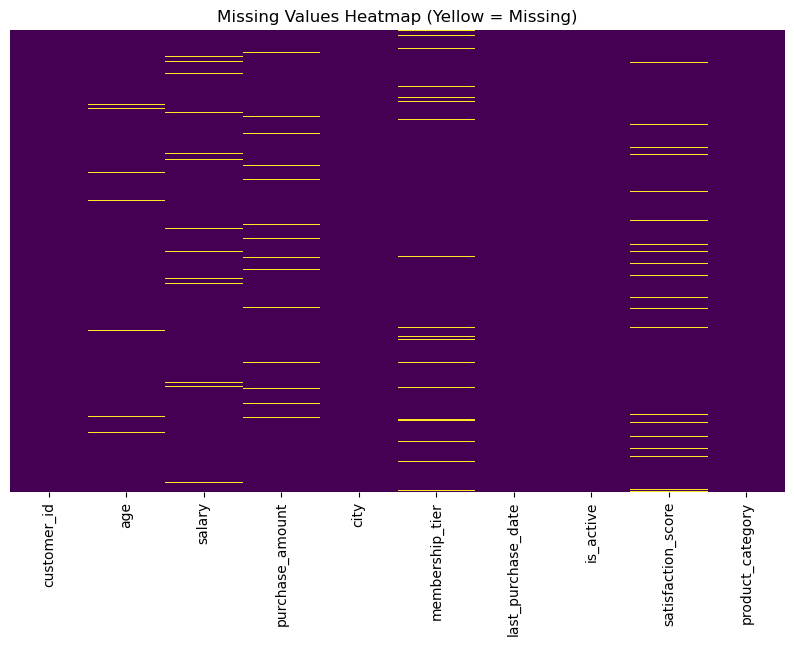


4. Rows with Missing Values:
   Number of rows with missing values: 162
   Percentage of rows: 16.12%

   Sample of rows with missing values:
   customer_id   age    salary  purchase_amount      city membership_tier  \
1     CUST0002  69.0  53051.95            45.94   Toronto            None   
2     CUST0003  46.0  38654.74            59.53  New York            None   
4     CUST0005  60.0  40301.41           217.33     Paris            Gold   
9     CUST0010  40.0  72199.16             0.32     Paris          Silver   
11    CUST0012  28.0       NaN            43.93  New York          Bronze   

   last_purchase_date  is_active  satisfaction_score product_category  
1          2022-01-02       True                 4.0            Books  
2          2022-01-03       True                 4.0             Home  
4          2022-01-05       True                 NaN             Food  
9          2022-01-10      False                 NaN            Books  
11         2022-01-12      False  

In [7]:
print("=== MISSING VALUE ANALYSIS ===")
print()

# Check for missing values
print("1. Missing Values Per Column:")
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent.round(2)
})
print(missing_df[missing_df['Missing_Count'] > 0])
print()

print("2. Total Missing Values:")
print(f"   Total missing cells: {df.isna().sum().sum()}")
print(f"   Percentage of total cells: {(df.isna().sum().sum() / df.size * 100):.2f}%")
print()

# Visualize missing values
print("3. Visualizing Missing Values:")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Yellow = Missing)')
plt.show()
print()

# Rows with missing values
print("4. Rows with Missing Values:")
rows_with_missing = df[df.isna().any(axis=1)]
print(f"   Number of rows with missing values: {len(rows_with_missing)}")
print(f"   Percentage of rows: {(len(rows_with_missing) / len(df) * 100):.2f}%")
print("\n   Sample of rows with missing values:")
print(rows_with_missing.head())
print()

# Pattern of missingness
print("5. Missing Value Patterns:")
print("   Columns that are missing together:")
missing_pattern = df.isna()
# Find correlations between missingness
missing_corr = missing_pattern.corr()
print(missing_corr)

## 6. Unique Value Analysis

### Methods:
- `.nunique()`: Count of unique values
- `.unique()`: Array of unique values
- `.value_counts()`: Frequency of each unique value
- `.value_counts(normalize=True)`: Relative frequencies

### Use Cases:
- Identify categorical variables
- Detect data entry errors
- Check for consistency
- Identify rare categories

In [8]:
print("=== UNIQUE VALUE ANALYSIS ===")
print()

# Count unique values per column
print("1. Number of Unique Values Per Column:")
print(f"{'Column':<25} {'Unique Values':<15} {'% of Total':<10}")
print("-" * 50)
for col in df.columns:
    nunique = df[col].nunique()
    pct_unique = (nunique / len(df)) * 100
    print(f"{col:<25} {nunique:<15} {pct_unique:<10.2f}")
print()

# View unique values
print("2. Unique Values for Categorical Columns:")
categorical_cols = ['city', 'membership_tier', 'product_category', 'is_active']
for col in categorical_cols:
    print(f"\n   {col}:")
    unique_vals = df[col].unique()
    print(f"   {len(unique_vals)} unique values: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")
print()

# Value counts with percentages
print("3. Value Counts with Percentages:")
for col in ['city', 'membership_tier']:
    print(f"\n   {col} distribution:")
    value_counts = df[col].value_counts(dropna=False)
    value_pct = df[col].value_counts(dropna=False, normalize=True) * 100
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percent': value_pct.round(2)
    })
    print(summary.head(10))  # Show top 10
    if len(summary) > 10:
        print(f"   ... and {len(summary) - 10} more categories")
print()

# Cardinality check (high vs low cardinality)
print("4. Cardinality Analysis:")
print("   High cardinality (many unique values):")
for col in df.columns:
    nunique = df[col].nunique()
    if nunique > 50 and df[col].dtype == 'object':
        print(f"   {col}: {nunique} unique values")
print("\n   Low cardinality (few unique values):")
for col in df.columns:
    nunique = df[col].nunique()
    if nunique <= 5:
        print(f"   {col}: {nunique} unique values ({df[col].unique()})")

=== UNIQUE VALUE ANALYSIS ===

1. Number of Unique Values Per Column:
Column                    Unique Values   % of Total
--------------------------------------------------
customer_id               1000            99.50     
age                       52              5.17      
salary                    976             97.11     
purchase_amount           952             94.73     
city                      8               0.80      
membership_tier           4               0.40      
last_purchase_date        1000            99.50     
is_active                 2               0.20      
satisfaction_score        5               0.50      
product_category          8               0.80      

2. Unique Values for Categorical Columns:

   city:
   8 unique values: ['Paris' 'Toronto' 'New York' 'Sydney' 'London' 'Berlin' 'Singapore'
 'Tokyo']

   membership_tier:
   5 unique values: ['Bronze' None 'Gold' 'Silver' 'Platinum']

   product_category:
   8 unique values: ['Home' 'Books' 'S

## 7. Duplicate Detection

### Methods:
- `.duplicated()`: Boolean mask of duplicate rows
- `.drop_duplicates()`: Remove duplicate rows
- `.duplicated(subset=[])`: Check duplicates in specific columns

### Importance:
- Data quality assurance
- Prevent double-counting
- Identify data collection issues

In [10]:
print("=== DUPLICATE DETECTION ===")
print()

# Check for duplicate rows
print("1. Duplicate Rows (entire row match):")
n_duplicates = df.duplicated().sum()
print(f"   Number of duplicate rows: {n_duplicates}")
print(f"   Percentage: {(n_duplicates / len(df) * 100):.2f}%")
print()

if n_duplicates > 0:
    print("   Sample duplicate rows:")
    duplicate_rows = df[df.duplicated(keep=False)]  # Show all duplicates
    print(duplicate_rows.head())
print()

# Check for duplicates in specific columns
print("2. Duplicates in Key Columns:")
key_columns = ['customer_id']  # Should be unique
for col in key_columns:
    n_dups = df[col].duplicated().sum()
    print(f"   {col}: {n_dups} duplicates")
    if n_dups > 0:
        dup_values = df[col][df[col].duplicated(keep=False)].unique()
        print(f"     Duplicate values: {dup_values[:5]}{'...' if len(dup_values) > 5 else ''}")
print()

# Find duplicate pairs
print("3. Find Duplicate Pairs:")
# Create a temporary duplicate flag
df['is_duplicate'] = df.duplicated(subset=['customer_id'], keep=False)
if df['is_duplicate'].any():
    duplicates = df[df['is_duplicate']].sort_values('customer_id')
    print(duplicates[['customer_id', 'age', 'city', 'salary']].head(10))
else:
    print("   No duplicates found in customer_id")
print()

# Remove duplicates (for demonstration)
print("4. Removing Duplicates:")
df_no_duplicates = df.drop_duplicates()
print(f"   Original shape: {df.shape}")
print(f"   After dropping duplicates: {df_no_duplicates.shape}")
print(f"   Rows removed: {df.shape[0] - df_no_duplicates.shape[0]}")
print()

# Keep first/last occurrence
print("5. Duplicate Removal Options:")
print("   keep='first' (default): Keep first occurrence, drop rest")
print("   keep='last': Keep last occurrence, drop rest")
print("   keep=False: Drop all duplicates")

=== DUPLICATE DETECTION ===

1. Duplicate Rows (entire row match):
   Number of duplicate rows: 5
   Percentage: 0.50%

   Sample duplicate rows:
  customer_id   age    salary  purchase_amount      city membership_tier  \
0    CUST0001  56.0  25903.31           560.87     Paris          Bronze   
1    CUST0002  69.0  53051.95            45.94   Toronto            None   
2    CUST0003  46.0  38654.74            59.53  New York            None   
3    CUST0004  32.0  28666.19           128.04     Paris          Bronze   
4    CUST0005  60.0  40301.41           217.33     Paris            Gold   

  last_purchase_date  is_active  satisfaction_score product_category  
0         2022-01-01       True                 5.0             Home  
1         2022-01-02       True                 4.0            Books  
2         2022-01-03       True                 4.0             Home  
3         2022-01-04      False                 2.0           Sports  
4         2022-01-05       True           

## 8. Data Distribution Visualization

### Quick Visualization Methods:
- `.hist()`: Histogram for numerical columns
- `.boxplot()`: Box plot for outlier detection
- `.plot.kde()`: Density plot
- `.plot.scatter()`: Scatter plot for relationships
- `.plot.bar()`: Bar plot for categorical data

### Benefits:
- Visualize distributions
- Identify outliers
- Understand relationships
- Spot patterns quickly

=== DATA DISTRIBUTION VISUALIZATION ===



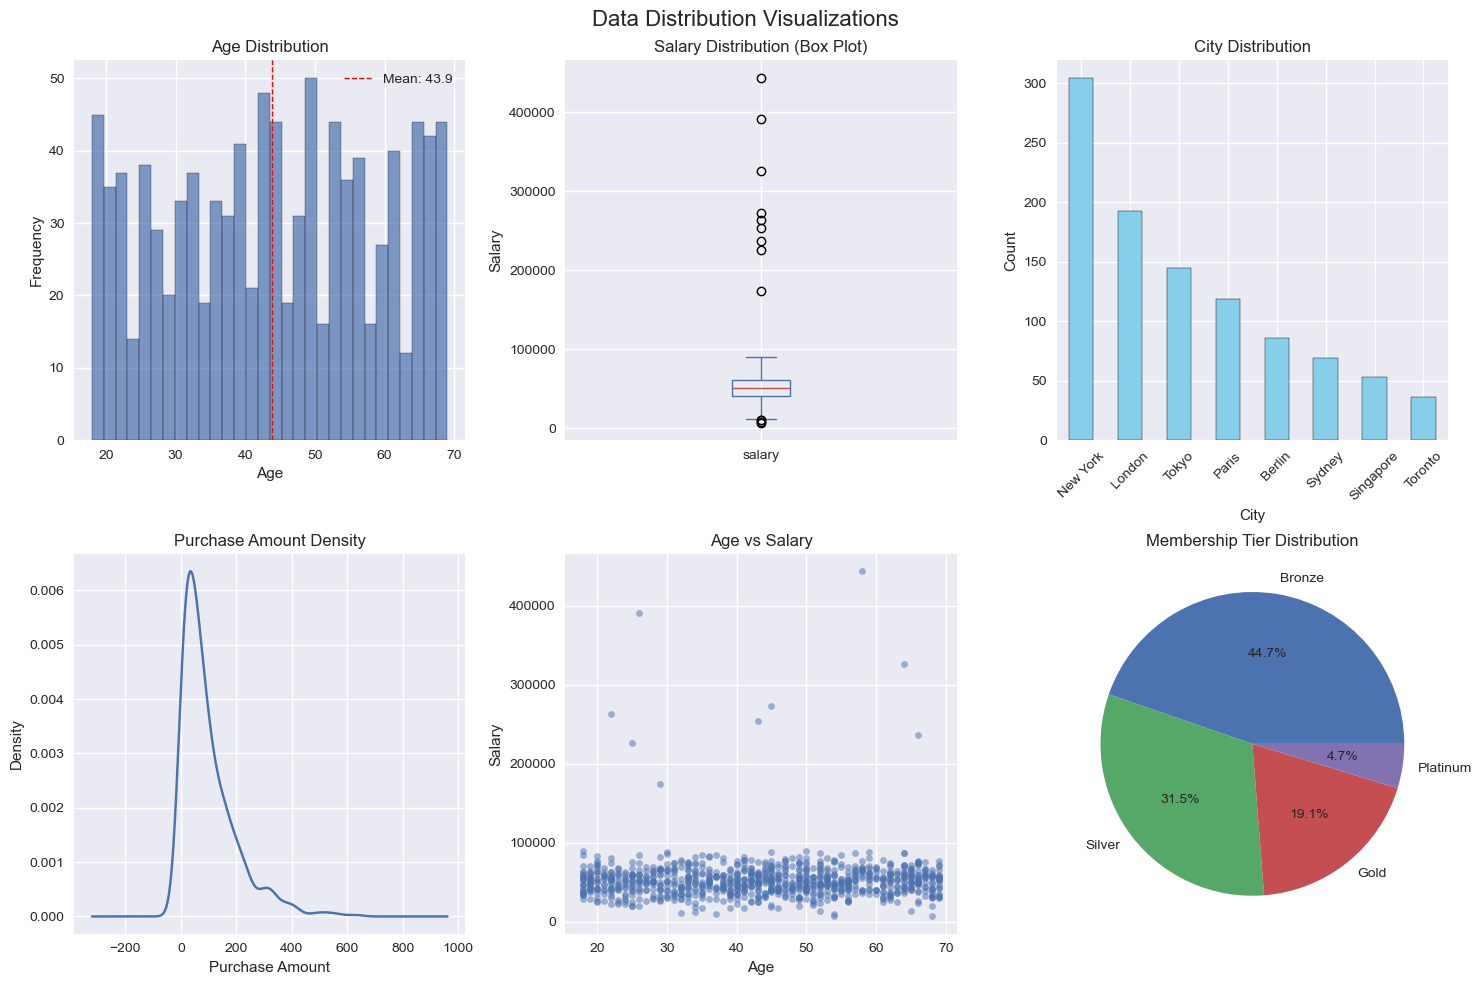


Correlation Matrix (Numerical Columns):


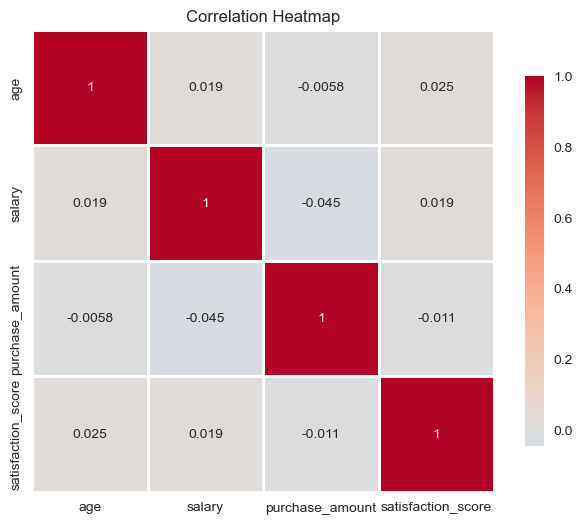

In [12]:
print("=== DATA DISTRIBUTION VISUALIZATION ===")
print()

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Data Distribution Visualizations', fontsize=16)

# 1. Histogram of age
df['age'].hist(ax=axes[0, 0], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["age"].mean():.1f}')
axes[0, 0].legend()

# 2. Box plot of salary
df['salary'].plot.box(ax=axes[0, 1])
axes[0, 1].set_title('Salary Distribution (Box Plot)')
axes[0, 1].set_ylabel('Salary')

# 3. Bar plot of city counts
df['city'].value_counts().plot.bar(ax=axes[0, 2], color='skyblue', edgecolor='black')
axes[0, 2].set_title('City Distribution')
axes[0, 2].set_xlabel('City')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. KDE plot of purchase amount
df['purchase_amount'].plot.kde(ax=axes[1, 0])
axes[1, 0].set_title('Purchase Amount Density')
axes[1, 0].set_xlabel('Purchase Amount')
axes[1, 0].set_ylabel('Density')

# 5. Scatter plot: Age vs Salary
axes[1, 1].scatter(df['age'], df['salary'], alpha=0.5, s=20)
axes[1, 1].set_title('Age vs Salary')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Salary')

# 6. Pie chart of membership tier (without missing)
membership_counts = df['membership_tier'].value_counts(dropna=True)
axes[1, 2].pie(membership_counts.values, labels=membership_counts.index, autopct='%1.1f%%')
axes[1, 2].set_title('Membership Tier Distribution')

plt.tight_layout()
plt.show()
print()

# Correlation heatmap for numerical columns
print("Correlation Matrix (Numerical Columns):")
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()

## 9. Outlier Detection

### Methods:
- Statistical methods (IQR, Z-score)
- Visualization (box plots, scatter plots)
- Domain knowledge-based thresholds

### Common Techniques:
1. **IQR Method**: Q1 - 1.5*IQR and Q3 + 1.5*IQR
2. **Z-score Method**: |Z| > 3
3. **Percentile Method**: Outside 1st and 99th percentiles

https://www.youtube.com/watch?v=A3gClkblXK8

=== OUTLIER DETECTION ===

1. Outlier Detection using IQR Method:
Column               Total      Outliers   % Outliers   Min        Max       
------------------------------------------------------------------------
age                  985        0          0.00       % 18.00      69.00     
salary               981        13         1.33       % 6556.17    443478.20 
purchase_amount      979        52         5.31       % 0.00       640.55    
satisfaction_score   956        0          0.00       % 1.00       5.00      

2. Extreme Outliers (Z-score > 3):

   salary: 9 outliers
   Example outliers: [253554.90000000002, 390759.7, 236132.35]...

   purchase_amount: 19 outliers
   Example outliers: [560.87, 640.55, 397.91]...

3. Visualizing Outliers:


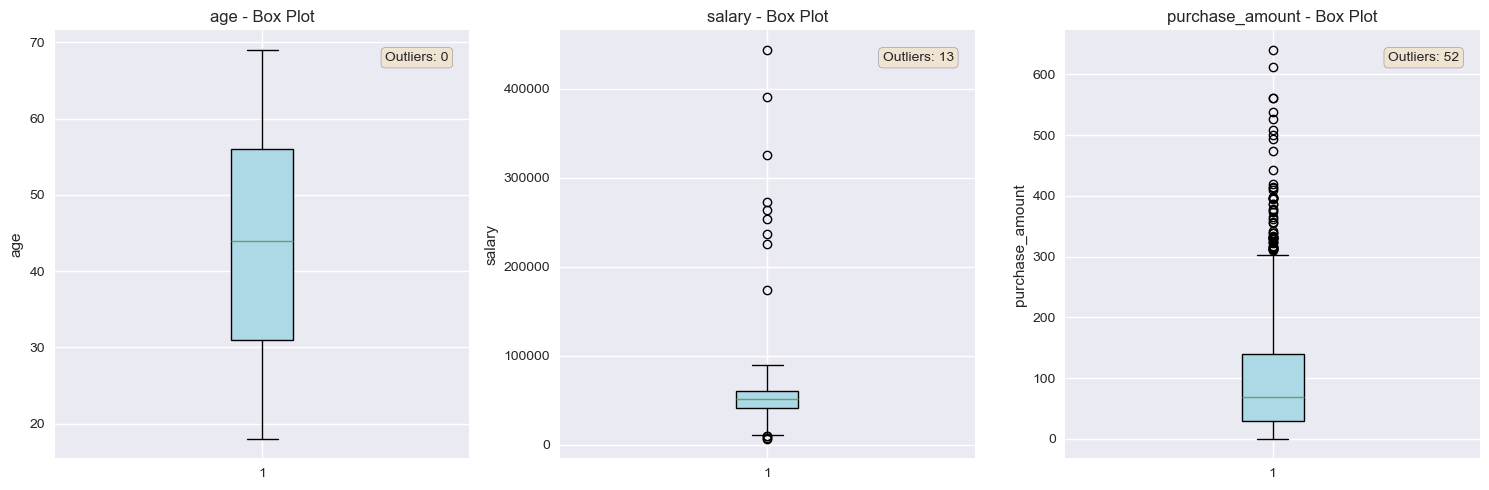


4. Handling Outliers (Options):
   a) Remove outliers:
      Original: (1005, 11), Without outliers: (940, 11)

   b) Cap outliers (winsorize):
      Salary capped between: [10954.93, 90539.01]

   c) Transform outliers (log transform):
      Created log_salary column


In [16]:
print("=== OUTLIER DETECTION ===")
print()

# Function to detect outliers using IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method (FIXED)
def detect_outliers_zscore(series, threshold=3):
    from scipy import stats
    clean_series = series.dropna()  # Work with clean data
    z_scores = np.abs(stats.zscore(clean_series))
    outliers = clean_series[z_scores > threshold]  # Use clean_series, not original
    return outliers

# Analyze numerical columns for outliers
print("1. Outlier Detection using IQR Method:")
print(f"{'Column':<20} {'Total':<10} {'Outliers':<10} {'% Outliers':<12} {'Min':<10} {'Max':<10}")
print("-" * 72)

numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_summary = []

for col in numeric_cols:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df[col].dropna())
        n_outliers = len(outliers)
        n_total = len(df[col].dropna())
        pct_outliers = (n_outliers / n_total * 100) if n_total > 0 else 0
        
        outlier_summary.append({
            'Column': col,
            'Total': n_total,
            'Outliers': n_outliers,
            '% Outliers': pct_outliers,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Actual Min': df[col].min(),
            'Actual Max': df[col].max()
        })
        
        print(f"{col:<20} {n_total:<10} {n_outliers:<10} {pct_outliers:<11.2f}% "
              f"{df[col].min():<10.2f} {df[col].max():<10.2f}")

outlier_df = pd.DataFrame(outlier_summary)
print()

# Show extreme outliers
print("2. Extreme Outliers (Z-score > 3):")
for col in numeric_cols:
    if col in df.columns:
        outliers = detect_outliers_zscore(df[col])
        if len(outliers) > 0:
            print(f"\n   {col}: {len(outliers)} outliers")
            print(f"   Example outliers: {outliers.iloc[:3].tolist()}{'...' if len(outliers) > 3 else ''}")
print()

# Visualize outliers (FIXED - check if columns exist)
print("3. Visualizing Outliers:")
plot_cols = [col for col in ['age', 'salary', 'purchase_amount'] if col in df.columns][:3]

if len(plot_cols) > 0:
    fig, axes = plt.subplots(1, len(plot_cols), figsize=(5*len(plot_cols), 5))
    if len(plot_cols) == 1:
        axes = [axes]  # Make it iterable
    
    for idx, col in enumerate(plot_cols):
        # Box plot
        bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        axes[idx].set_title(f'{col} - Box Plot')
        axes[idx].set_ylabel(col)
        
        # Add text with outlier count
        outliers, _, _ = detect_outliers_iqr(df[col].dropna())
        axes[idx].text(0.95, 0.95, f'Outliers: {len(outliers)}', 
                       transform=axes[idx].transAxes, ha='right', va='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
else:
    print("   No numeric columns found for plotting")
print()

# Handle outliers (demonstration) - FIXED
print("4. Handling Outliers (Options):")
print("   a) Remove outliers:")
# Get all outlier indices across numeric columns
all_outlier_indices = set()
for col in numeric_cols:
    if col in df.columns:
        outliers, _, _ = detect_outliers_iqr(df[col].dropna())
        all_outlier_indices.update(outliers.index)

df_no_outliers = df.drop(index=all_outlier_indices)
print(f"      Original: {df.shape}, Without outliers: {df_no_outliers.shape}")
print()

print("   b) Cap outliers (winsorize):")
df_capped = df.copy()
if 'salary' in df.columns:
    _, lower, upper = detect_outliers_iqr(df['salary'].dropna())
    df_capped['salary'] = df_capped['salary'].clip(lower=lower, upper=upper)
    print(f"      Salary capped between: [{lower:.2f}, {upper:.2f}]")
print()

print("   c) Transform outliers (log transform):")
df_transformed = df.copy()
if 'salary' in df.columns:
    df_transformed['log_salary'] = np.log1p(df_transformed['salary'])
    print("      Created log_salary column")


## 10. Advanced Inspection Techniques

### Advanced Methods:
- Cross-tabulations
- Group-wise statistics
- Time-based analysis
- Pattern detection
- Data profiling reports

=== ADVANCED INSPECTION TECHNIQUES ===

1. Cross-tabulation:
   City vs Membership Tier:
membership_tier  Bronze  Gold  Platinum  Silver  Total
city                                                  
Berlin               40    10         5      28     83
London               86    30         7      61    184
New York            118    59        15      96    288
Paris                55    25         4      29    113
Singapore            27     8         1      14     50
Sydney               27    10         5      25     67
Tokyo                60    35         5      37    137
Toronto              14     5         3      11     33
Total               427   182        45     301    955

   City vs Membership Tier (Row %):
membership_tier  Bronze   Gold  Platinum  Silver
city                                            
Berlin            48.19  12.05      6.02   33.73
London            46.74  16.30      3.80   33.15
New York          40.97  20.49      5.21   33.33
Paris             48.67 

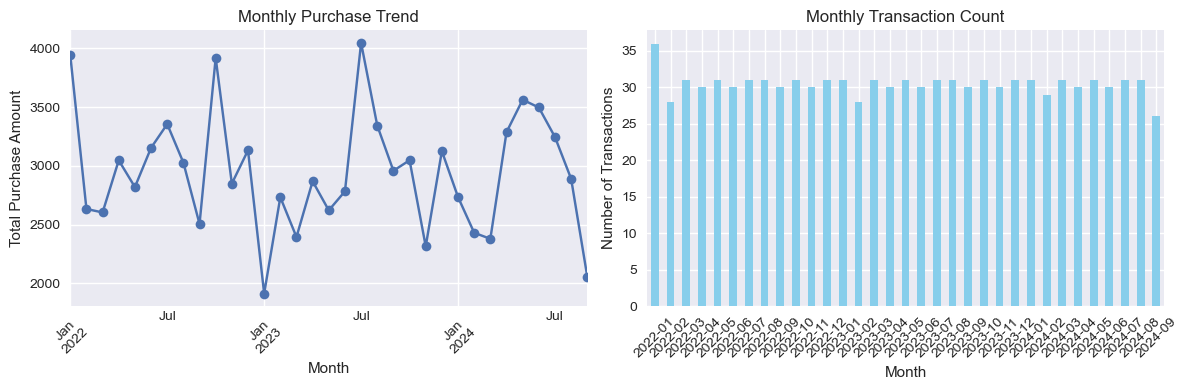


4. Pattern Detection:
   Check for purchase patterns by day of week:
                mean  count       sum
purchase_day                         
Monday         95.71    139  13303.85
Tuesday       107.38    139  14925.81
Wednesday      84.61    141  11929.55
Thursday       92.35    138  12744.50
Friday        112.86    140  15800.96
Saturday      113.54    140  15896.20
Sunday         88.81    142  12611.45


In [17]:
print("=== ADVANCED INSPECTION TECHNIQUES ===")
print()

# Cross-tabulation
print("1. Cross-tabulation:")
print("   City vs Membership Tier:")
cross_tab = pd.crosstab(df['city'], df['membership_tier'], margins=True, margins_name="Total")
print(cross_tab)
print()

# With percentages
print("   City vs Membership Tier (Row %):")
cross_tab_pct = pd.crosstab(df['city'], df['membership_tier'], 
                           normalize='index') * 100
print(cross_tab_pct.round(2))
print()

# Group-wise statistics
print("2. Group-wise Analysis:")
print("   Average salary by city:")
group_stats = df.groupby('city')['salary'].agg(['mean', 'median', 'std', 'count'])
print(group_stats.round(2))
print()

print("   Age and salary statistics by membership tier:")
group_stats2 = df.groupby('membership_tier').agg({
    'age': ['mean', 'median', 'min', 'max'],
    'salary': ['mean', 'median', 'std'],
    'customer_id': 'count'
}).round(2)
print(group_stats2)
print()

# Time-based analysis
print("3. Time-based Analysis:")
if 'last_purchase_date' in df.columns:
    df['purchase_month'] = df['last_purchase_date'].dt.to_period('M')
    monthly_stats = df.groupby('purchase_month').agg({
        'purchase_amount': 'sum',
        'customer_id': 'count',
        'salary': 'mean'
    }).round(2)
    monthly_stats.columns = ['Total_Purchase', 'Transaction_Count', 'Avg_Salary']
    print(monthly_stats.head())
    print()
    
    # Time trend visualization
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    monthly_stats['Total_Purchase'].plot(kind='line', marker='o')
    plt.title('Monthly Purchase Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Purchase Amount')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    monthly_stats['Transaction_Count'].plot(kind='bar', color='skyblue')
    plt.title('Monthly Transaction Count')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
print()

# Pattern detection
print("4. Pattern Detection:")
print("   Check for purchase patterns by day of week:")
if 'last_purchase_date' in df.columns:
    df['purchase_day'] = df['last_purchase_date'].dt.day_name()
    day_pattern = df.groupby('purchase_day')['purchase_amount'].agg(['mean', 'count', 'sum'])
    day_pattern = day_pattern.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    print(day_pattern.round(2))

## 11. Automated Data Profiling

### pandas-profiling Library:
- Generates comprehensive HTML reports
- Includes statistics, visualizations, correlations
- Identifies missing values, duplicates, outliers
- Easy to use: `ProfileReport(df)`

### Installation:
```bash
pip install pandas-profiling
# or
pip install ydata-profiling  # newer version

In [19]:

print("=== AUTOMATED DATA PROFILING ===")
print()

# Check if pandas-profiling is available
try:
    from ydata_profiling import ProfileReport
    HAS_PROFILING = True
except ImportError:
    try:
        from pandas_profiling import ProfileReport
        HAS_PROFILING = True
    except ImportError:
        HAS_PROFILING = False
        print("pandas-profiling/ ydata-profiling not installed.")
        print("Install with: pip install ydata-profiling")
        print("Or for older version: pip install pandas-profiling")

if HAS_PROFILING:
    print("Generating profile report... (This may take a moment)")
    
    # Create a smaller subset for faster demonstration
    df_sample = df.sample(500, random_state=42)
    
    # Generate the report
    profile = ProfileReport(df_sample, title="Data Inspection Report", explorative=True)
    
    # Display in notebook
    profile.to_notebook_iframe()
    
    # To save as HTML file:
    # profile.to_file("data_inspection_report.html")
    
    print("\nReport generated successfully!")
    print("Features included in the report:")
    print("1. Overview with warnings")
    print("2. Variables (detailed analysis per column)")
    print("3. Interactions (scatter plots)")
    print("4. Correlations (multiple methods)")
    print("5. Missing values analysis")
    print("6. Sample rows")
else:
    print("\nManual alternative: Create summary statistics")
    print(df.describe(include='all').T)

=== AUTOMATED DATA PROFILING ===

pandas-profiling/ ydata-profiling not installed.
Install with: pip install ydata-profiling
Or for older version: pip install pandas-profiling

Manual alternative: Create summary statistics
                    count unique          top freq  \
customer_id          1005   1000     CUST0001    2   
age                 985.0    NaN          NaN  NaN   
salary              981.0    NaN          NaN  NaN   
purchase_amount     979.0    NaN          NaN  NaN   
city                 1005      8     New York  304   
membership_tier       955      4       Bronze  427   
last_purchase_date   1005    NaN          NaN  NaN   
is_active            1005      2         True  707   
satisfaction_score  956.0    NaN          NaN  NaN   
product_category     1005      8  Electronics  148   
is_duplicate         1005      2        False  995   
purchase_month       1005     33      2022-01   36   
purchase_day         1005      7     Saturday  144   

                    

## 12. Data Quality Assessment Framework

### Data Quality Dimensions:
1. **Completeness**: Presence of missing values
2. **Uniqueness**: Duplicate records
3. **Validity**: Adherence to defined formats/rules
4. **Accuracy**: Correctness of data values
5. **Consistency**: Uniformity across the dataset
6. **Timeliness**: Data freshness and relevance

### Assessment Checklist:
- [ ] Check for missing values
- [ ] Identify duplicate records
- [ ] Validate data types
- [ ] Check value ranges
- [ ] Verify business rules
- [ ] Assess data freshness

In [20]:
print("=== DATA QUALITY ASSESSMENT ===")
print()

# Create a data quality assessment function
def assess_data_quality(df):
    """Comprehensive data quality assessment"""
    
    quality_report = {
        'dimension': [],
        'metric': [],
        'value': [],
        'score': [],
        'issues': []
    }
    
    # 1. Completeness
    total_cells = df.size
    missing_cells = df.isna().sum().sum()
    completeness = ((total_cells - missing_cells) / total_cells) * 100
    
    quality_report['dimension'].append('Completeness')
    quality_report['metric'].append('Missing Values')
    quality_report['value'].append(f"{missing_cells}/{total_cells}")
    quality_report['score'].append(completeness)
    quality_report['issues'].append(f"{missing_cells} missing values ({missing_cells/df.shape[0]:.2f} per row)")
    
    # 2. Uniqueness
    duplicate_rows = df.duplicated().sum()
    uniqueness = ((len(df) - duplicate_rows) / len(df)) * 100
    
    quality_report['dimension'].append('Uniqueness')
    quality_report['metric'].append('Duplicate Rows')
    quality_report['value'].append(f"{duplicate_rows}/{len(df)}")
    quality_report['score'].append(uniqueness)
    quality_report['issues'].append(f"{duplicate_rows} duplicate rows found")
    
    # 3. Validity (example: age should be between 18 and 100)
    invalid_age = df[(df['age'] < 18) | (df['age'] > 100)].shape[0]
    validity = ((len(df) - invalid_age) / len(df)) * 100 if 'age' in df.columns else 100
    
    quality_report['dimension'].append('Validity')
    quality_report['metric'].append('Invalid Age Values')
    quality_report['value'].append(f"{invalid_age}/{len(df)}")
    quality_report['score'].append(validity)
    quality_report['issues'].append(f"{invalid_age} age values outside 18-100 range")
    
    # 4. Consistency (example: salary should be positive)
    invalid_salary = df[df['salary'] < 0].shape[0] if 'salary' in df.columns else 0
    consistency = ((len(df) - invalid_salary) / len(df)) * 100 if 'salary' in df.columns else 100
    
    quality_report['dimension'].append('Consistency')
    quality_report['metric'].append('Negative Salary')
    quality_report['value'].append(f"{invalid_salary}/{len(df)}")
    quality_report['score'].append(consistency)
    quality_report['issues'].append(f"{invalid_salary} negative salary values")
    
    # Create DataFrame
    quality_df = pd.DataFrame(quality_report)
    
    return quality_df

# Run assessment
print("Data Quality Assessment Report:")
print("-" * 80)
quality_df = assess_data_quality(df)
print(quality_df.to_string(index=False))
print()

# Calculate overall score
overall_score = quality_df['score'].mean()
print(f"Overall Data Quality Score: {overall_score:.1f}/100")
print()

# Color code based on score
def score_color(score):
    if score >= 90:
        return "🟢 Excellent"
    elif score >= 80:
        return "🟡 Good"
    elif score >= 70:
        return "🟠 Acceptable"
    else:
        return "🔴 Needs Improvement"

print("Score Interpretation:")
for idx, row in quality_df.iterrows():
    print(f"  {row['dimension']}: {score_color(row['score'])} ({row['score']:.1f})")

=== DATA QUALITY ASSESSMENT ===

Data Quality Assessment Report:
--------------------------------------------------------------------------------
   dimension             metric     value      score                            issues
Completeness     Missing Values 169/13065  98.706468 169 missing values (0.17 per row)
  Uniqueness     Duplicate Rows    5/1005  99.502488            5 duplicate rows found
    Validity Invalid Age Values    0/1005 100.000000 0 age values outside 18-100 range
 Consistency    Negative Salary    0/1005 100.000000          0 negative salary values

Overall Data Quality Score: 99.6/100

Score Interpretation:
  Completeness: 🟢 Excellent (98.7)
  Uniqueness: 🟢 Excellent (99.5)
  Validity: 🟢 Excellent (100.0)
  Consistency: 🟢 Excellent (100.0)


# Summary: Data Inspection Best Practices

## Inspection Workflow:
1. **Start with `.info()` and `.head()`** - Quick overview
2. **Check `.shape` and `.dtypes`** - Structure and types
3. **Use `.describe()`** - Statistical summary
4. **Analyze missing values** - `.isna().sum()`
5. **Check for duplicates** - `.duplicated().sum()`
6. **Examine unique values** - `.nunique()`, `.value_counts()`
7. **Visualize distributions** - Histograms, box plots
8. **Detect outliers** - IQR method, visualization
9. **Assess data quality** - Completeness, validity, consistency

## Key Methods Quick Reference:

### Basic Inspection:
- `.shape` - Dimensions
- `.info()` - Comprehensive overview
- `.describe()` - Statistics
- `.head()` / `.tail()` - View samples
- `.sample()` - Random samples

### Missing Values:
- `.isna()` - Boolean mask
- `.isna().sum()` - Count per column
- `.isna().sum().sum()` - Total missing
- `.dropna()` - Remove missing
- `.fillna()` - Fill missing

### Unique Values:
- `.nunique()` - Count unique
- `.unique()` - Get unique values
- `.value_counts()` - Frequency table
- `.value_counts(normalize=True)` - Relative frequency

### Duplicates:
- `.duplicated()` - Find duplicates
- `.drop_duplicates()` - Remove duplicates
- `.duplicated().sum()` - Count duplicates

### Data Types:
- `.dtypes` - Column types
- `.select_dtypes()` - Filter by type
- `.astype()` - Convert types
- `.memory_usage()` - Memory consumption

## Best Practices:
1. **Always inspect data first** before analysis
2. **Document findings** - Keep notes of issues
3. **Create data quality reports** - Track improvements
4. **Use visualizations** - Spot patterns quickly
5. **Check business rules** - Validate against requirements
6. **Handle outliers appropriately** - Don't automatically remove
7. **Consider memory usage** - Optimize data types
8. **Automate inspection** with profiling tools

## Common Issues to Look For:
- Missing values affecting calculations
- Duplicate records skewing results
- Outliers distorting statistics
- Incorrect data types preventing operations
- Inconsistent formatting (dates, categories)
- Violations of business rules
- Memory issues with large datasets

# Practice Exercises

## Exercise 1: Basic Inspection
1. Load a dataset of your choice (or use the sample above)
2. Display the first 10 rows and last 5 rows
3. Show the shape and data types
4. Generate a statistical summary

## Exercise 2: Missing Value Analysis
1. Count missing values per column
2. Calculate percentage of missing values
3. Identify rows with the most missing values
4. Create a visualization of missing values

## Exercise 3: Unique Value Exploration
1. Count unique values for each categorical column
2. Display value counts for 3 categorical variables
3. Identify high cardinality columns (>50 unique values)
4. Find rare categories (appearing <5 times)

## Exercise 4: Outlier Detection
1. Use IQR method to detect outliers in numerical columns
2. Visualize outliers using box plots
3. Count outliers per column
4. Decide how to handle outliers (remove, cap, or keep)

## Exercise 5: Data Quality Report
1. Create a function that assesses data quality dimensions
2. Calculate scores for completeness, uniqueness, validity
3. Generate a summary report
4. Suggest data cleaning steps based on findings

## Exercise 6: Advanced Analysis
1. Perform group-wise analysis (e.g., by category)
2. Create cross-tabulations between two categorical variables
3. Analyze time trends (if date column exists)
4. Calculate correlations between numerical variables

## Tools and Libraries:
1. **ydata-profiling**: Automated data profiling reports
2. **Sweetviz**: Visual comparison of datasets
3. **pandas-gui**: Graphical interface for pandas
4. **D-Tale**: Web-based GUI for data analysis